[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


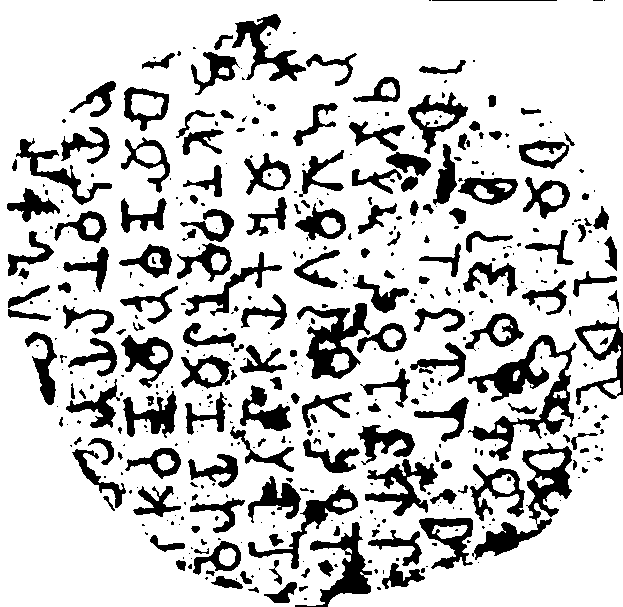

False

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
 
# Loading the image
img = cv2.imread('/content/drive/MyDrive/Capstone Project/Research Papers/Images/new_images/mb3_result.jpeg')
#cv2_imshow(img) 
# preprocess the image
gray_img = cv2.cvtColor(img ,
                        cv2.COLOR_BGR2GRAY)
 
# Applying 3x3 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (3, 3), 0)
 
# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
print(threshold)
# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
 
# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")
 
# Loop through each component
for i in range(1, totalLabels):
    
      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]
        #print(area) 
    if (area > 50):
        # Create a new image for bounding boxes
        new_img=img.copy()
         
        # Now extract the coordinate points
        x1 = values[i, cv2.CC_STAT_LEFT]
        y1 = values[i, cv2.CC_STAT_TOP]
        w = values[i, cv2.CC_STAT_WIDTH]
        h = values[i, cv2.CC_STAT_HEIGHT]
         
        # Coordinate of the bounding box
        pt1 = (x1, y1)
        pt2 = (x1+ w, y1+ h)
        (X, Y) = centroid[i]
         
        # Bounding boxes for each component
        cv2.rectangle(new_img,pt1,pt2,
                      (0, 255, 0), 3)
        cv2.circle(new_img, (int(X),
                             int(Y)),
                   4, (0, 0, 255), -1)
 
        # Create a new array to show individual component
        component = np.zeros(gray_img.shape, dtype="uint8")
        componentMask = (label_ids == i).astype("uint8") * 255
 
        # Apply the mask using the bitwise operator
        component = cv2.bitwise_or(component,componentMask)
        output = cv2.bitwise_or(output, componentMask)
         
        # Show the final images
        #cv2_imshow(new_img)
        #cv2_imshow(component)
cv2_imshow(output)
cv2.imwrite('/content/drive/MyDrive/Capstone Project/Research Papers/Images/connected_components_result/mb3_result.jpeg',output)
        #print(area)
        #print('------------------------------------------')

In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
threshold = cv2.threshold(blurred, 0, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]